In [16]:
%matplotlib inline

import io, os, sys, types, datetime, pickle, warnings

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import numpy as np

warnings.filterwarnings('ignore')

In [17]:
master_path = os.getcwd()
if master_path not in sys.path:
    sys.path.append(master_path)

In [18]:
def parse_folder_info(path):
    folders = [f for f in os.listdir(path) if not os.path.isfile(os.path.join(path, f))]
    files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    if('.DS_Store' in files):
        files.remove('.DS_Store')
    if('._.DS_Store' in files):
        files.remove('._.DS_Store')
    return folders, files

In [19]:
def get_time_columns(columns):
    time_str = []
    time_datetime = []
    for col in columns:
        if col[0].isnumeric():
            time_str.append(col)
            time_datetime.append(datetime.datetime.strptime(col, '%m/%d/%y'))
    return time_str, time_datetime

In [20]:
def format_fn(tick_val, tick_pos):
    if(tick_val >= 0 and tick_val < len(time_str)):
        return time_str[int(tick_val)]
    else:
        return int(tick_val)

In [21]:
cat_color = {'Confirmed':'tab:blue', 'Deaths':'tab:orange', 'Recovered':'tab:green', 'Active':'tab:red'}

In [22]:
path_time_series = os.path.join(master_path, 'csse_covid_19_data', 'csse_covid_19_time_series')

In [23]:
folders, files = parse_folder_info(path_time_series)
df_time_series = pd.DataFrame()
# df_time_series_reorged = pd.DataFrame(columns = ['Country/Region', 'Province/State', 'Date', 'Category', 'Number'])
for file_name in files:
    if('.csv' in file_name):
        df_current = pd.read_csv(os.path.join(path_time_series, file_name))        
        category = file_name[21:file_name.index('.csv')]
        print(category)
        df_current.loc[:,'Category'] = category
        if df_time_series.empty:
            df_time_series = df_current
        else:
            df_time_series = df_time_series.append(df_current, ignore_index = True)

time_str, time_datetime = get_time_columns(df_time_series.columns)
# pd.to_datetime()

Recovered
Deaths
Confirmed


In [24]:
df_time_series.loc[:,'New Today'] = df_time_series.loc[:,time_str[-1]] - df_time_series.loc[:,time_str[-2]]

In [25]:
""" Total Recovered, death, and confirmed """

' Total Recovered, death, and confirmed '

In [40]:
df_time_series.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', 'Category',
       'New Today'],
      dtype='object')

In [47]:
df_time_series.shape

(606, 51)

In [48]:
total.shape

(4, 45)

In [27]:
total = df_time_series.groupby('Category').sum().loc[:,time_str]
mainland_china = df_time_series.groupby('Country/Region').get_group('Mainland China').groupby('Category').sum().loc[:,time_str]
row = total - mainland_china
hubei = df_time_series.groupby('Country/Region').get_group('Mainland China').groupby('Province/State').get_group('Hubei').groupby('Category').sum().loc[:,time_str]
china_others = mainland_china - hubei

total.loc['Active',:] = total.loc['Confirmed',:] - (total.loc['Recovered',:] + total.loc['Deaths',:])
mainland_china.loc['Active',:] = mainland_china.loc['Confirmed',:] - (mainland_china.loc['Recovered',:] + mainland_china.loc['Deaths',:])
row.loc['Active',:] = row.loc['Confirmed',:] - (row.loc['Recovered',:] + row.loc['Deaths',:])
hubei.loc['Active',:] = hubei.loc['Confirmed',:] - (hubei.loc['Recovered',:] + hubei.loc['Deaths',:])
china_others.loc['Active',:] = china_others.loc['Confirmed',:] - (china_others.loc['Recovered',:] + china_others.loc['Deaths',:])

In [55]:
total

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20
Category,,,,,,,,,,,,,,,,,,,,,
Confirmed,555.0,653.0,941.0,1434.0,2118.0,2927.0,5578.0,6166.0,8234.0,9927.0,...,81397.0,82756.0,84122.0,86013.0,88371.0,90309.0,92844.0,95124.0,97886.0,101800.0
Deaths,17.0,18.0,26.0,42.0,56.0,82.0,131.0,133.0,171.0,213.0,...,2770.0,2814.0,2872.0,2941.0,2996.0,3085.0,3160.0,3254.0,3348.0,3460.0
Recovered,28.0,30.0,36.0,39.0,52.0,61.0,107.0,126.0,143.0,222.0,...,30384.0,33277.0,36711.0,39782.0,42716.0,45602.0,48229.0,51171.0,53797.0,55866.0
Active,510.0,605.0,879.0,1353.0,2010.0,2784.0,5340.0,5907.0,7920.0,9492.0,...,48243.0,46665.0,44539.0,43290.0,42659.0,41622.0,41455.0,40699.0,40741.0,42474.0


In [56]:
df_france = df_time_series[df_time_series['Country/Region'] == 'France'].groupby('Category').sum().loc[:,time_str]
df_france.loc['Active'] = df_france.loc['Confirmed',:] -df_france.loc['Recovered',:]-df_france.loc['Deaths',:]

In [57]:
cat

'Active'

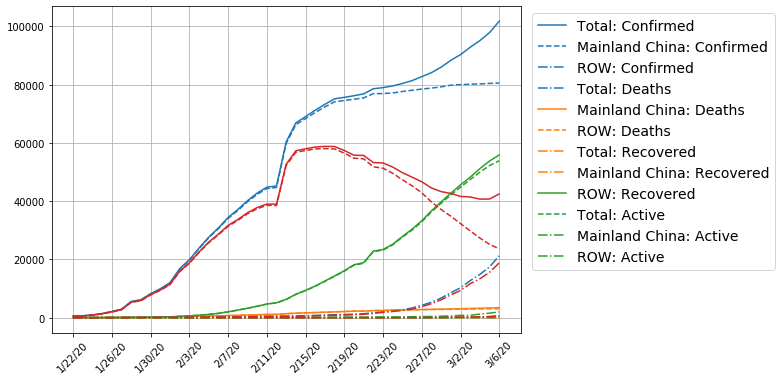

In [72]:
fig, ax1 = plt.subplots(1,1, figsize = (7*1.2,5*1.2))
for cat in cat_color:
    ax1.plot(total.groupby('Category').get_group(cat).sum()[time_str], color = cat_color[cat])
    ax1.plot(mainland_china.groupby('Category').get_group(cat).sum()[time_str], '--', color = cat_color[cat])
    ax1.plot(row.groupby('Category').get_group(cat).sum()[time_str], '-.', color = cat_color[cat])
    ax1.plot(df_france.groupby('Category').get_group(cat).sum()[time_str], '-.', color = cat_color[cat])
legend = ['Total: Confirmed',
         'Mainland China: Confirmed',
          'ROW: Confirmed',
         'Total: Deaths',
         'Mainland China: Deaths',
          'ROW: Deaths',
         'Total: Recovered',
         'Mainland China: Recovered',
          'ROW: Recovered',
         'Total: Active',
         'Mainland China: Active',
         'ROW: Active']
myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
ax1.tick_params(axis = 'x', labelrotation = 45)
# ax1.set_title('Total', size = 18)
plt.legend(legend, bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1, fontsize = 14)
plt.grid()

In [62]:
df_france.loc['Active']

1/22/20      0.0
1/23/20      0.0
1/24/20      2.0
1/25/20      3.0
1/26/20      3.0
1/27/20      3.0
1/28/20      4.0
1/29/20      5.0
1/30/20      5.0
1/31/20      5.0
2/1/20       6.0
2/2/20       6.0
2/3/20       6.0
2/4/20       6.0
2/5/20       6.0
2/6/20       6.0
2/7/20       6.0
2/8/20      11.0
2/9/20      11.0
2/10/20     11.0
2/11/20     11.0
2/12/20      9.0
2/13/20      9.0
2/14/20      9.0
2/15/20      7.0
2/16/20      7.0
2/17/20      7.0
2/18/20      7.0
2/19/20      7.0
2/20/20      7.0
2/21/20      7.0
2/22/20      7.0
2/23/20      7.0
2/24/20      7.0
2/25/20      2.0
2/26/20      5.0
2/27/20     25.0
2/28/20     44.0
2/29/20     86.0
3/1/20     116.0
3/2/20     176.0
3/3/20     188.0
3/4/20     269.0
3/5/20     359.0
3/6/20     632.0
Name: Active, dtype: float64

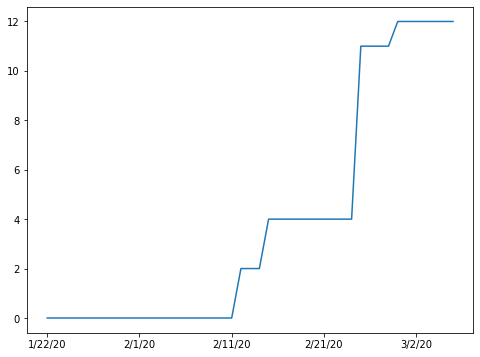

In [75]:
fig,ax1 = plt.subplots(1,1,figsize=(8,6))
ax1.plot(df_france.loc['Recovered'])
myLocator = mticker.MultipleLocator(10)
ax1.xaxis.set_major_locator(myLocator)
#ax1.tick_params(axis = 'x', labelrotation = 45)

In [88]:
df_france.shift(0,axis=1)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20
Category,,,,,,,,,,,,,,,,,,,,,
Confirmed,0.0,0.0,2.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,...,18.0,38.0,57.0,100.0,130.0,191.0,204.0,285.0,377.0,653.0
Deaths,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,3.0,4.0,4.0,6.0,9.0
Recovered,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,11.0,11.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
Active,0.0,0.0,2.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,...,5.0,25.0,44.0,86.0,116.0,176.0,188.0,269.0,359.0,632.0


In [90]:
france_growth = df_france.diff(axis=1)/df_france.shift(1,axis=1)

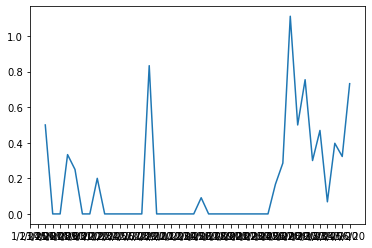

In [92]:
plt.plot(france_growth.loc['Confirmed'])

NameError: name 'others' is not defined

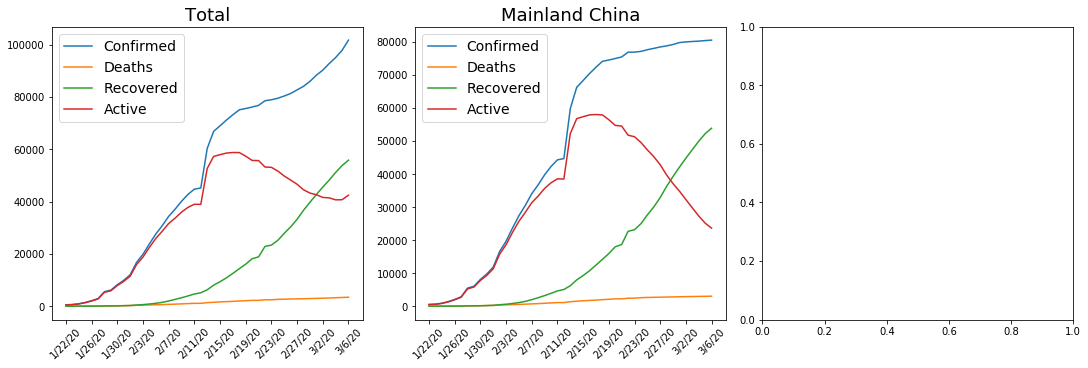

In [30]:
fig = plt.figure(figsize = (15, 5), constrained_layout=True)
gs = fig.add_gridspec(1,3)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(total.transpose())
myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
ax1.tick_params(axis = 'x', labelrotation = 45)
ax1.legend(total.index, fontsize = 14)
ax1.set_title('Total', size = 18)

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(mainland_china.transpose())
myLocator = mticker.MultipleLocator(4)
ax2.xaxis.set_major_locator(myLocator)
ax2.tick_params(axis = 'x', labelrotation = 45)
ax2.legend(mainland_china.index, fontsize = 14)
ax2.set_title('Mainland China', size = 18)

ax3 = fig.add_subplot(gs[0, 2])
ax3.plot(others.transpose())
myLocator = mticker.MultipleLocator(4)
ax3.xaxis.set_major_locator(myLocator)
ax3.tick_params(axis = 'x', labelrotation = 45)
ax3.legend(others.index, fontsize = 14)
ax3.set_title('Other Countries/Regions', size = 18)

AttributeError: 'DataFrame' object has no attribute 'to_numpy'

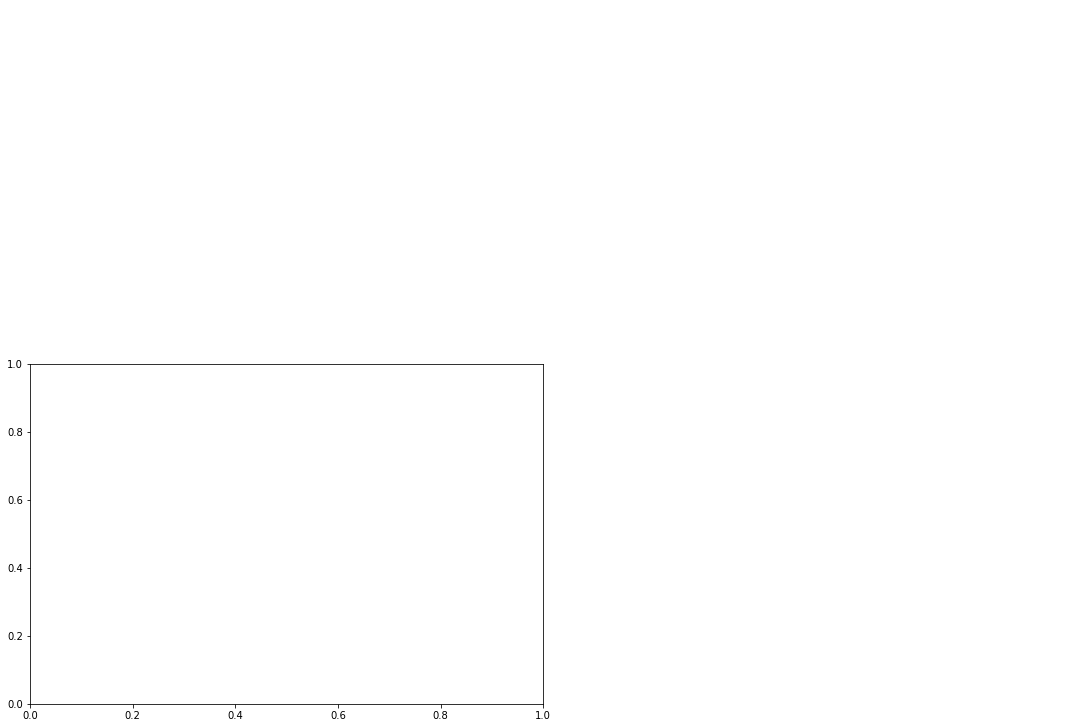

In [31]:
fig = plt.figure(figsize = (15, 10), constrained_layout=True)
gs = fig.add_gridspec(2,2)

ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(np.transpose(mainland_china.to_numpy())[1:,:-1] - np.transpose(mainland_china.to_numpy())[:-1,:-1])
a = ax2.set_xticklabels(time_str[1:])
ax2.xaxis.set_major_formatter(mticker.FuncFormatter(format_fn))
myLocator = mticker.MultipleLocator(4)
ax2.xaxis.set_major_locator(myLocator)
ax2.set_ylim(top = 6000)
ax2.tick_params(axis = 'x', labelrotation = 45)
ax2.legend(mainland_china.index, fontsize = 14)
ax2.set_title('Mainland China Daily Cases', size = 18)

ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(np.transpose(others.to_numpy())[1:,:-1] - np.transpose(others.to_numpy())[:-1,:-1])
ax3.xaxis.set_major_formatter(mticker.FuncFormatter(format_fn))
myLocator = mticker.MultipleLocator(4)
ax3.xaxis.set_major_locator(myLocator)
ax3.tick_params(axis = 'x', labelrotation = 45)
a = ax3.set_xticklabels(time_str[1:])
ax3.legend(others.index, fontsize = 14)
ax3.set_title('ROW Daily Cases', size = 18)

ax4 = fig.add_subplot(gs[0, :])

data1 = total.loc['Confirmed',:].to_numpy()[1:] - total.loc['Confirmed',:].to_numpy()[:-1]
data2 = mainland_china.loc['Confirmed',:].to_numpy()[1:] - mainland_china.loc['Confirmed',:].to_numpy()[0:-1]
data3 = others.loc['Confirmed',:].to_numpy()[1:] - others.loc['Confirmed',:].to_numpy()[0:-1]

x = np.arange(len(data1))
width = 0.25
ax4.bar(x + 0, data1, width = width)
ax4.bar(x + width*1, data2, width = width)
ax4.bar(x + width*2, data3, width = width)
ax4.set_yscale('linear')
ax4.set_ylim([0, 5000])
a = ax4.set_xticks(x + width)
a = ax4.set_xticklabels(time_str[1:])
ax4.tick_params(axis = 'x', labelrotation = 45)
ax4.legend(['Total', 'Mainland China', 'ROW'], fontsize = 18, loc='upper left')
ax4.set_title('Daily Cases', size = 24)

NameError: name 'others' is not defined

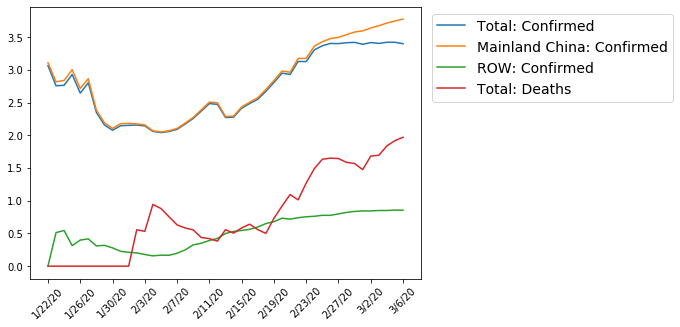

In [32]:
data1 = total.loc['Deaths',time_str] / total.loc['Confirmed',time_str]
# data2 = 
# data3 = 
# data4 = 

fig, ax1 = plt.subplots(1,1,figsize = (7,5))

ax1.plot(total.loc['Deaths',time_str] / total.loc['Confirmed',time_str] * 100)
ax1.plot(mainland_china.loc['Deaths',time_str] / mainland_china.loc['Confirmed',time_str] * 100)
ax1.plot(china_others.loc['Deaths',time_str] / china_others.loc['Confirmed',time_str] * 100)
ax1.plot(row.loc['Deaths',time_str] / row.loc['Confirmed',time_str] * 100)
plt.legend(['Total',
            'Mainland China',
            'Mainland China w/o Hubei',
            'ROW'
           ])
myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
ax1.tick_params(axis = 'x', labelrotation = 45)
# ax1.set_title('Total', size = 18)
plt.legend(legend, bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1, fontsize = 14)

dr1 = china_others.loc['Deaths', time_str[-1]]/china_others.loc['Confirmed', time_str[-1]] * 100
dr2 = others.loc['Deaths', time_str[-1]]/others.loc['Confirmed', time_str[-1]] * 100
print(f'Fatality rate in Mainland China (outside Hubei): {dr1:.2f}%')
print(f'Fatality rate in rest of the world: {dr2:.2f}%')

In [33]:
"""US"""

'US'

In [34]:
df_US = df_time_series.groupby(['Country/Region']).get_group(('US'))
df_Ca = pd.DataFrame()
df_DP = pd.DataFrame()
df_USmain = pd.DataFrame()

for i in df_US.index:
    if ('CA' in df_US.loc[i, 'Province/State']):
        if('(From Diamond Princess)' not in df_US.loc[i, 'Province/State']) :
            df_Ca = df_Ca.append(df_US.loc[i,:])
    if('(From Diamond Princess)'in df_US.loc[i, 'Province/State']) :
        df_DP = df_DP.append(df_US.loc[i,:])
    else:
        df_USmain = df_USmain.append(df_US.loc[i,:])

df_US = df_US.groupby('Category').sum().loc[:,time_str]
df_Ca = df_Ca.groupby('Category').sum().loc[:,time_str]
df_DP = df_DP.groupby('Category').sum().loc[:,time_str]
df_USmain = df_USmain.groupby('Category').sum().loc[:,time_str]

df_US.loc['Active',:] = df_US.loc['Confirmed',:] - (df_US.loc['Recovered',:] + df_US.loc['Deaths',:])
df_Ca.loc['Active',:] = df_Ca.loc['Confirmed',:] - (df_Ca.loc['Recovered',:] + df_Ca.loc['Deaths',:])
df_DP.loc['Active',:] = df_DP.loc['Confirmed',:] - (df_DP.loc['Recovered',:] + df_DP.loc['Deaths',:])
df_USmain.loc['Active',:] = df_USmain.loc['Confirmed',:] - (df_USmain.loc['Recovered',:] + df_USmain.loc['Deaths',:])

NameError: name 'others' is not defined

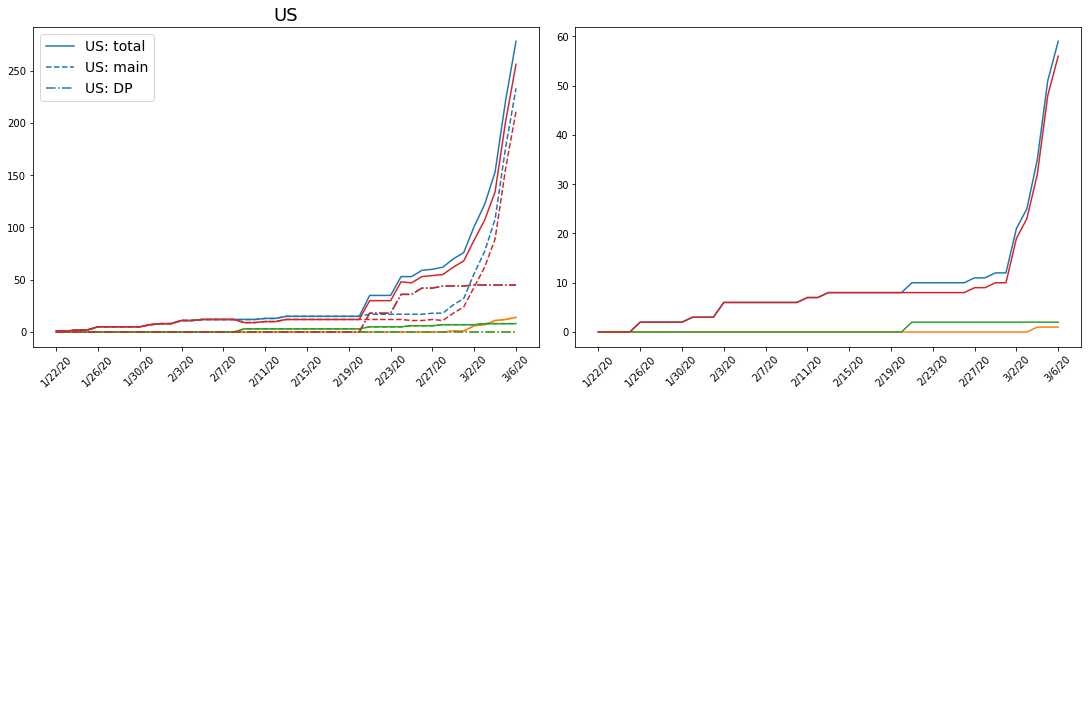

In [35]:
fig = plt.figure(figsize = (15, 10), constrained_layout=True)
gs = fig.add_gridspec(2,2)

ax1 = fig.add_subplot(gs[0, 0])
for cat in cat_color:
    ax1.plot(df_US.loc[cat,:].transpose(), color = cat_color[cat])
    ax1.plot(df_USmain.loc[cat,:].transpose(), '--', color = cat_color[cat])
    ax1.plot(df_DP.loc[cat,:].transpose(), '-.', color = cat_color[cat])
legend = ['US: total', 'US: main', 'US: DP']
myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
ax1.tick_params(axis = 'x', labelrotation = 45)
ax1.legend(legend, fontsize = 14)
ax1.set_title('US', size = 18)

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(df_Ca.transpose())
myLocator = mticker.MultipleLocator(4)
ax2.xaxis.set_major_locator(myLocator)
ax2.tick_params(axis = 'x', labelrotation = 45)
ax2.legend(others.index, fontsize = 14)
ax2.set_title('California', size = 18)

ax3 = fig.add_subplot(gs[1, :])
data1 = df_USmain.loc['Confirmed',:].to_numpy()[1:] - df_USmain.loc['Confirmed',:].to_numpy()[0:-1] 
data2 = df_Ca.loc['Confirmed',:].to_numpy()[1:] - df_Ca.loc['Confirmed',:].to_numpy()[0:-1] 
x = np.arange(len(data1))
width = 0.35
rects1 = ax3.bar(x - width/2, data1, width = width)
rects2 = ax3.bar(x + width/2, data2, width = width)
ax3.set_yscale('linear')
# ax3.set_yscale('linear')
# ax3.set_ylim([0, 1000])
a = ax3.set_xticks(x)
a = ax3.set_xticklabels(time_str[1:])
ax3.tick_params(axis = 'x', labelrotation = 45)
ax3.legend(['US (w/o DP)', 'California'], fontsize = 14)
ax3.set_title('Daily Cases', size = 18)

In [ ]:
""" Mainland China """

In [ ]:
# mainland_china_group = df_time_series.groupby('Country/Region').get_group('Mainland China')
# total_china = df_time_series.groupby('Country/Region').get_group('Mainland China').groupby('Category').sum().loc[:,time_str]
# hubei = mainland_china_group.groupby('Province/State').get_group('Hubei').groupby('Category').sum().loc[:,time_str]
# china_others = total_china - hubei

# total_china.loc['Active',:] = total_china.loc['Confirmed',:] - (total_china.loc['Recovered',:] + total_china.loc['Deaths',:])
# hubei.loc['Active',:] = hubei.loc['Confirmed',:] - (hubei.loc['Recovered',:] + hubei.loc['Deaths',:])
# china_others.loc['Active',:] = china_others.loc['Confirmed',:] - (china_others.loc['Recovered',:] + china_others.loc['Deaths',:])

In [ ]:
fig = plt.figure(figsize = (15, 12), constrained_layout=True)
gs = fig.add_gridspec(3,2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(hubei.transpose())
myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
ax1.tick_params(axis = 'x', labelrotation = 45)
ax1.legend(hubei.index, fontsize = 14)
ax1.set_title('Hubei', size = 18)

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(china_others.transpose())
myLocator = mticker.MultipleLocator(4)
ax2.xaxis.set_major_locator(myLocator)
ax2.tick_params(axis = 'x', labelrotation = 45)
ax2.legend(others.index, fontsize = 14)
ax2.set_title('Other Provinces', size = 18)

ax3 = fig.add_subplot(gs[1, :])
data1 = hubei.loc['Confirmed',:].to_numpy()[1:] - hubei.loc['Confirmed',:].to_numpy()[:-1]
data2 = china_others.loc['Confirmed',:].to_numpy()[1:] - china_others.loc['Confirmed',:].to_numpy()[0:-1]
x = np.arange(len(data1))
width = 0.35
rects1 = ax3.bar(x - width/2, data1, width = width)
rects2 = ax3.bar(x + width/2, data2, width = width)
ax3.set_yscale('log')
# ax3.set_yscale('linear')
# ax3.set_ylim([0, 1000])
a = ax3.set_xticks(x)
a = ax3.set_xticklabels(time_str[1:])
ax3.tick_params(axis = 'x', labelrotation = 45)
ax3.legend(['Hubei', 'Other Provinces'], fontsize = 14)
ax3.set_ylim(bottom = 10**-0.1)
ax3.set_title('Daily Cases', size = 18)

ax4 = fig.add_subplot(gs[2, 0])
ax4.plot(np.transpose(hubei.to_numpy())[1:,:-1] - np.transpose(hubei.to_numpy())[:-1,:-1])
ax4.xaxis.set_major_formatter(mticker.FuncFormatter(format_fn))
myLocator = mticker.MultipleLocator(4)
ax4.xaxis.set_major_locator(myLocator)
ax4.set_ylim(top = 6000)
ax4.tick_params(axis = 'x', labelrotation = 45)
ax4.legend(mainland_china.index, fontsize = 14)
ax4.set_title('Hubei Daily', size = 18)

ax5 = fig.add_subplot(gs[2, 1])
ax5.plot(np.transpose(china_others.to_numpy())[1:,:-1] - np.transpose(china_others.to_numpy())[:-1,:-1])
ax5.xaxis.set_major_formatter(mticker.FuncFormatter(format_fn))
myLocator = mticker.MultipleLocator(4)
ax5.xaxis.set_major_locator(myLocator)
ax4.tick_params(axis = 'x', labelrotation = 45)
ax5.legend(others.index, fontsize = 14)
ax5.set_title('Other Provinces Daily', size = 18)

In [ ]:
""" Outside Mainland China"""

In [ ]:
df_confirmed = df_time_series.groupby('Category').get_group('Confirmed').groupby('Country/Region').sum()
df_active = df_time_series.groupby('Category').get_group('Confirmed').groupby('Country/Region').sum()\
            - (df_time_series.groupby('Category').get_group('Recovered').groupby('Country/Region').sum() \
               + df_time_series.groupby('Category').get_group('Deaths').groupby('Country/Region').sum())
df_death = df_time_series.groupby('Category').get_group('Deaths').groupby('Country/Region').sum()

In [ ]:
def autolabel(rects, ax, str_format):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(str_format.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

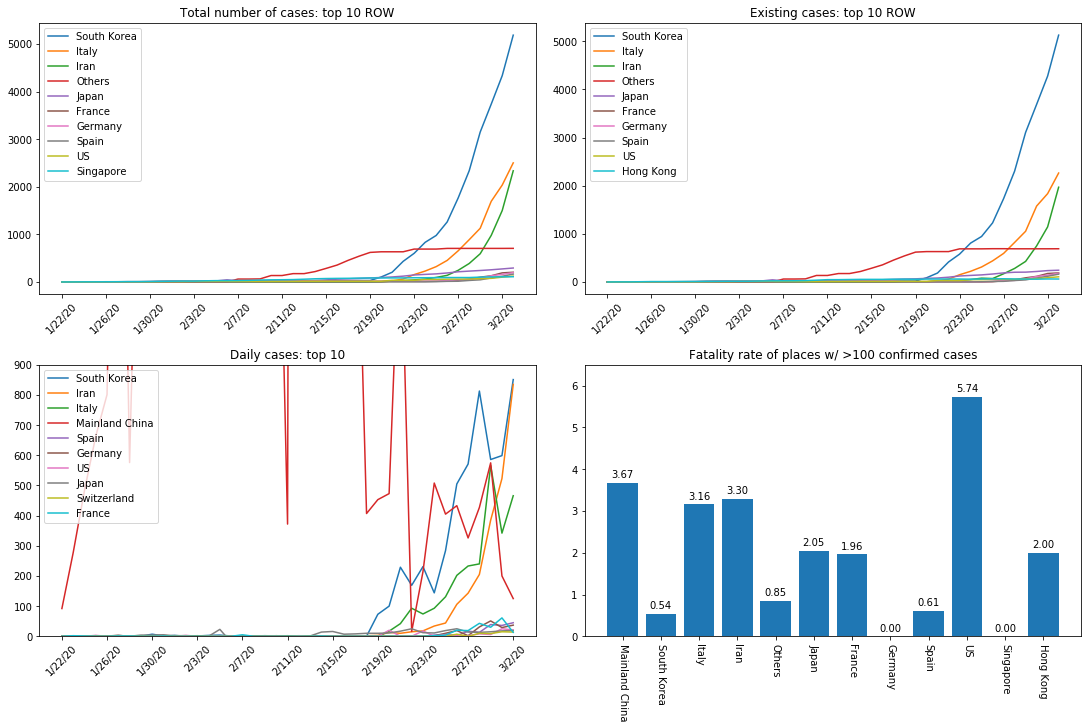

In [190]:
fig = plt.figure(figsize = (15, 10), constrained_layout=True)
gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(gs[0, 0])

df_confirmed.sort_values(by = time_str[-1], inplace = True, ascending=False)
countries = list(df_confirmed.index[1:11])
df_plot = df_confirmed.loc[countries,time_str]

ax1.plot(df_plot.transpose())
ax1.legend(countries)
ax1.set_yscale('linear')
# plt.ylim(top = 2000)
ax1.set_title('Total number of cases: top 10 ROW')
myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
ax1.tick_params(axis = 'x', labelrotation = 45)


ax3 = fig.add_subplot(gs[0, 1])

df_active.sort_values(by = time_str[-1], inplace = True, ascending=False)
countries = list(df_active.index[1:11])
df_plot = df_active.loc[countries,time_str]

ax3.plot(df_plot.transpose())
ax3.legend(countries)
ax3.set_yscale('linear')
# plt.ylim(top = 2000)
ax3.set_title('Existing cases: top 10 ROW')
myLocator = mticker.MultipleLocator(4)
ax3.xaxis.set_major_locator(myLocator)
ax3.tick_params(axis = 'x', labelrotation = 45)


ax2 = fig.add_subplot(gs[1, 0])

df_confirmed.sort_values(by = 'New Today', inplace = True, ascending=False)
countries = list(df_confirmed.index[0:10])
# print(countries)
# if('Mainland China' in countries):
#     countries.remove('Mainland China')
#     countries.append(df_confirmed.index[11])
data = df_confirmed.loc[countries,time_str].to_numpy().transpose()

ax2.plot(data[1:,:] - data[0:-1,:])
ax2.legend(countries, loc = 'upper left')
ax2.set_yscale('linear')
ax2.set_ylim([0, 900])
a = ax2.set_title('Daily cases: top 10')
ax2.xaxis.set_major_formatter(mticker.FuncFormatter(format_fn))
myLocator = mticker.MultipleLocator(4)
ax2.xaxis.set_major_locator(myLocator)
ax2.tick_params(axis = 'x', labelrotation = 45)

ax4 = fig.add_subplot(gs[1, 1])

df_confirmed.sort_values(by = time_str[-1], inplace = True, ascending=False)
countries = [ctry for ctry in df_confirmed.index if df_confirmed.loc[ctry,time_str[-1]] >= 100]
fatal_rates = df_deaths.loc[countries,time_str] / df_confirmed.loc[countries,time_str] * 100
x = np.arange(len(countries))

rects = ax4.bar(x, fatal_rates.loc[:,time_str[-1]])
a = ax4.set_xticks(x)
a = ax4.set_xticklabels(countries)
ax4.tick_params(axis = 'x', labelrotation = -90)
autolabel(rects, ax4, '{:.2f}')
ax4.set_ylim([0, 6.5])
a = ax4.set_title('Fatality rate of places w/ >100 confirmed cases')
# ax4.plot(fatal_rates.transpose())
# ax4.legend(countries)
# ax4.set_yscale('linear')
# plt.ylim(top = 20)
# ax4.set_title('Fatality Rates')
# ax4.xaxis.set_major_formatter(mticker.FuncFormatter(format_fn))
# myLocator = mticker.MultipleLocator(4)
# ax4.xaxis.set_major_locator(myLocator)
# ax4.tick_params(axis = 'x', labelrotation = 45)

In [27]:
### world bar graph

In [28]:
df_confirmed = df_time_series.groupby('Category').get_group('Confirmed').groupby('Country/Region').sum()
df_recovered = df_time_series.groupby('Category').get_group('Recovered').groupby('Country/Region').sum()
df_deaths = df_time_series.groupby('Category').get_group('Deaths').groupby('Country/Region').sum()
df_confirmed.sort_values(by = time_str[-1], inplace = True, ascending=False)
df_recovered.sort_values(by = time_str[-1], inplace = True, ascending=False)
df_deaths.sort_values(by = time_str[-1], inplace = True, ascending=False)

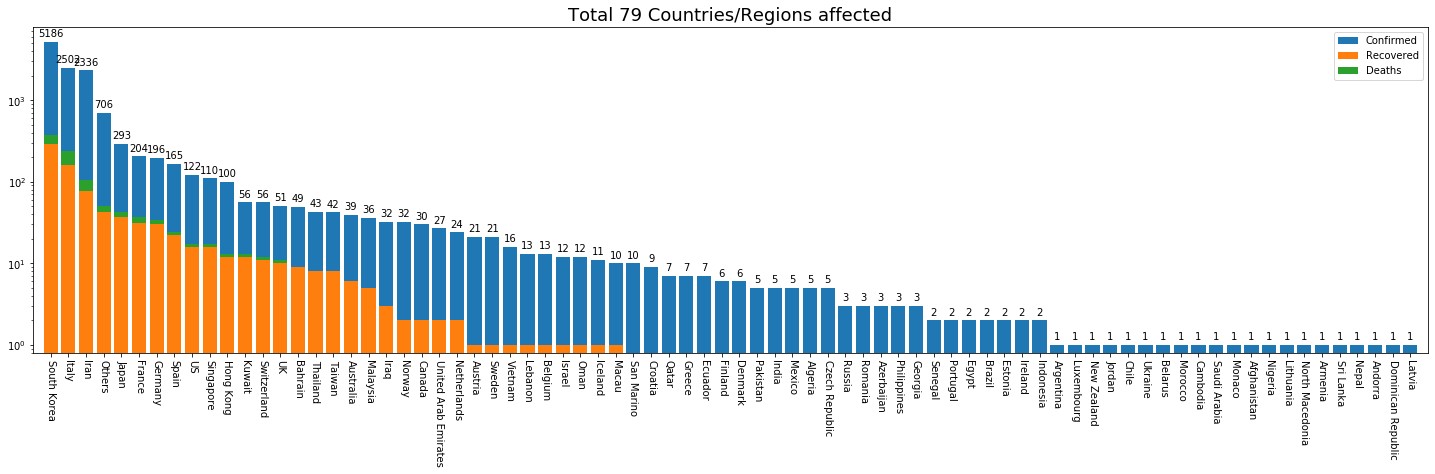

In [212]:
recovered = df_recovered.iloc[1:][time_str[-1]].to_numpy()
deaths = df_deaths.iloc[1:][time_str[-1]].to_numpy()
confirmed = df_confirmed.iloc[1:][time_str[-1]].to_numpy()
x = np.arange(len(confirmed))

fig, ax = plt.subplots(1,1,figsize = (25,6))
rects = ax.bar(x, confirmed)
plt.bar(x, recovered)
plt.bar(x, deaths, bottom = recovered)

plt.legend(['Confirmed', 'Recovered', 'Deaths'])
plt.yscale('log')
plt.ylim(bottom = 10**-0.1)
plt.xlim([-1, len(x)])
a = ax.set_xticks(x)
a = ax.set_xticklabels(list(df_confirmed.index)[1:])
a = plt.xticks(rotation=-90)
a = plt.title(f'Total {len(df_confirmed.index)} Countries/Regions affected', fontsize = 18)
autolabel(rects, ax, '{}')

In [30]:
df_confirmed.loc['Egypt',time_str[-1]]

2